<a href="https://colab.research.google.com/github/0906Bao/TriTueNhanTao/blob/main/Tuan05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [101]:
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

In [102]:
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [103]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

In [104]:
def kmeans_update_centers(X, labels, centers):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range (n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [105]:
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [106]:
def kmeans_Visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_color[i] + '^', markersize=4, label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_color[i + 4] + 'o', markersize=10, label='center_' + str(i))
    plt.legend()
    plt.show()

In [107]:
def kmeans(innit_centers, init_labels, X, n_cluster):
  centers = innit_centers
  labels = init_labels
  times = 0
  while 1:
    labels = kmeans_predict_labels(X, centers)
    kmeans_Visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' +str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_Visualize(X, centers, labels, n_cluster, 'Update center position at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[-0.64872767  1.42419421]
 [ 9.7047278   0.63317337]
 [ 7.50851916  1.52194329]]


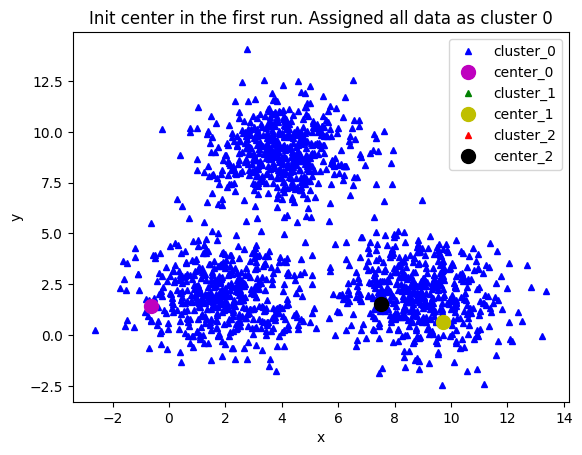

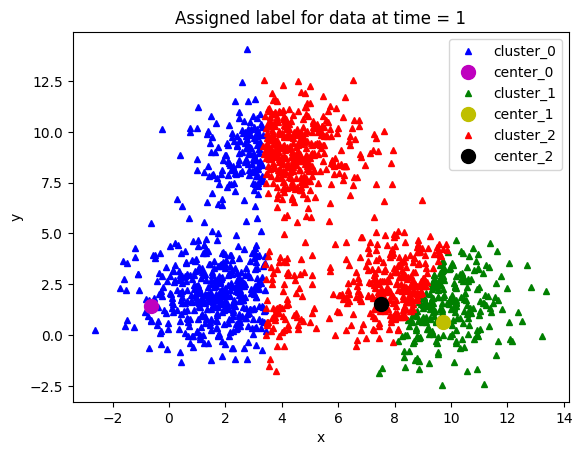

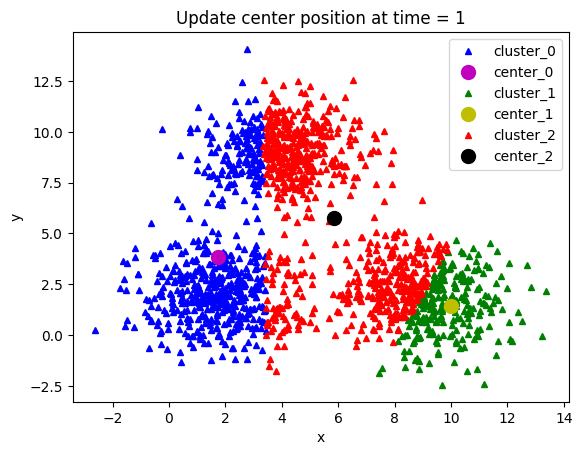

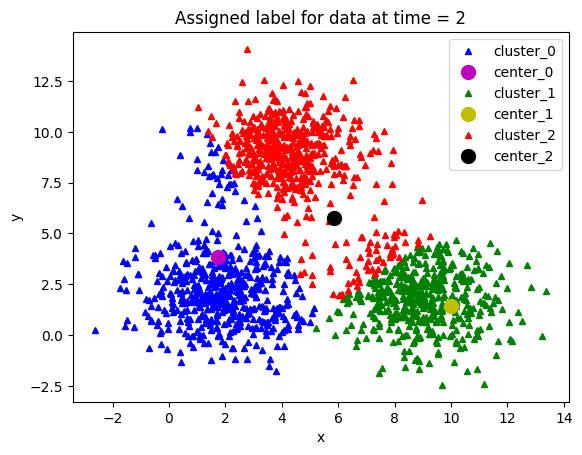

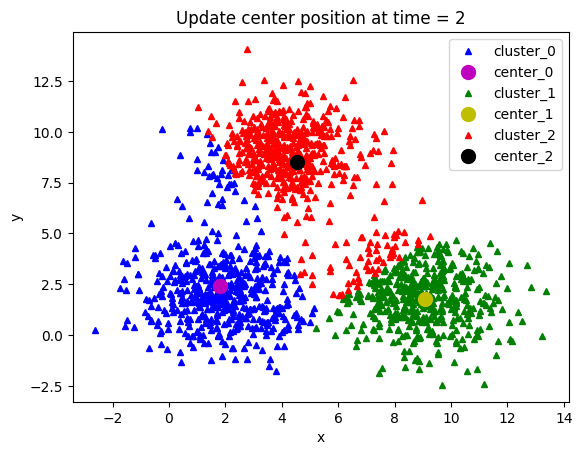

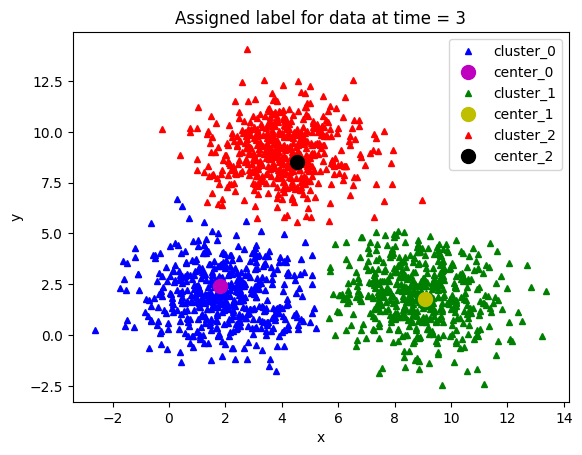

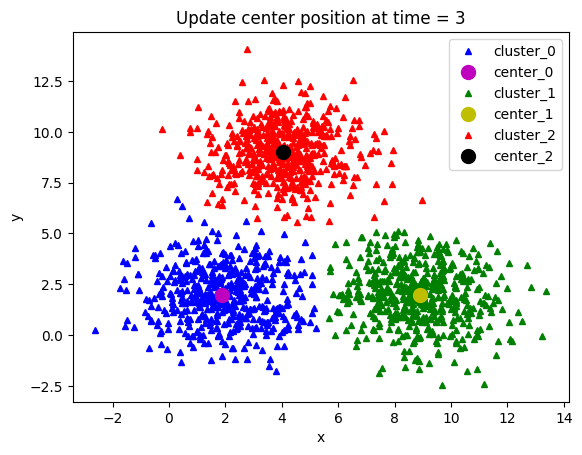

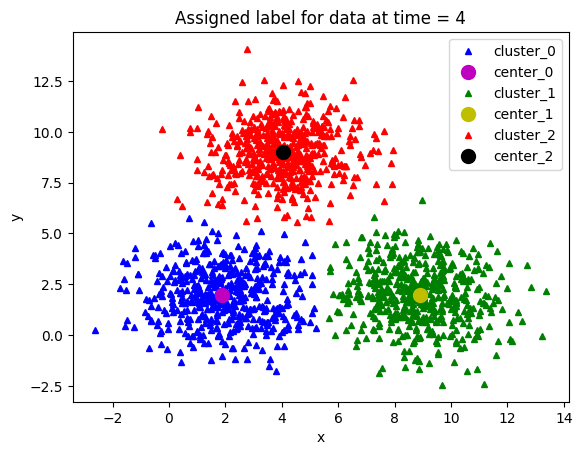

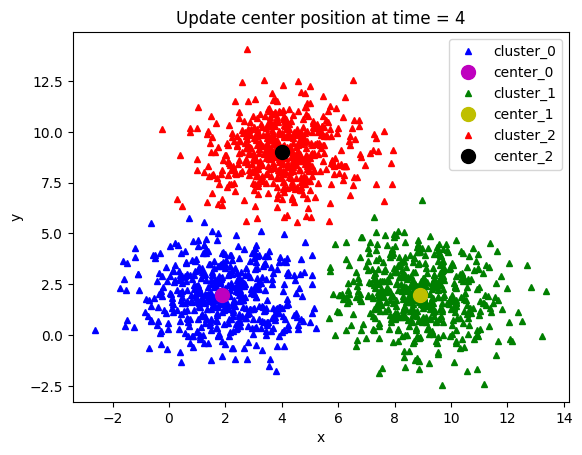

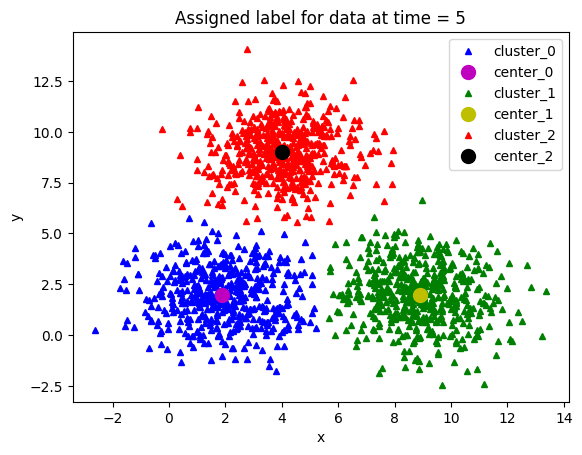

Done! Kmeans has converged after 4 times
[[1.89488512 1.96346779]
 [8.89700259 1.99254875]
 [4.01616411 9.0271075 ]]


In [108]:
if __name__ == '__main__':
  innit_centers = kmeans_init_centers(X, n_cluster)
  print(innit_centers)
  innit_labels = np.zeros(X.shape[0])
  kmeans_Visualize(X, innit_centers, innit_labels, n_cluster, 'Init center in the first run. Assigned all data as cluster 0')
  centers, labels, times, = kmeans(innit_centers, innit_labels, X, n_cluster)
  print('Done! Kmeans has converged after', times, 'times')
  print(centers)

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [110]:
X, y = make_blobs (n_samples = 100, n_features = 2, centers = 4, cluster_std = 1, random_state =4)

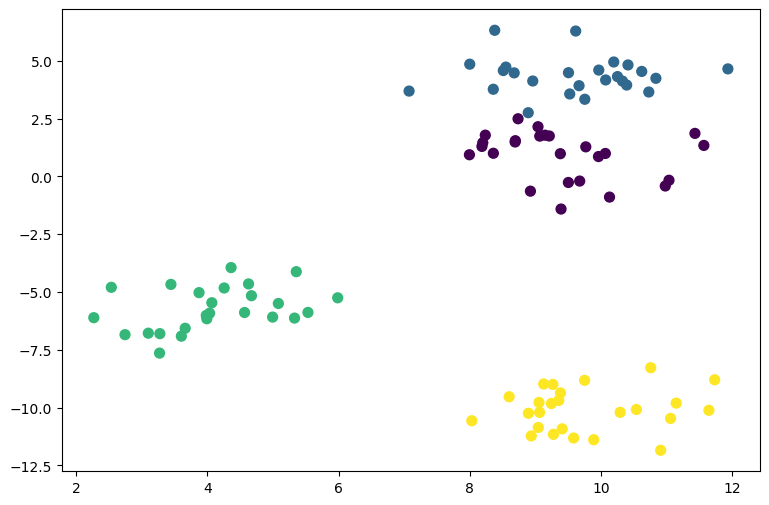

In [111]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.show()

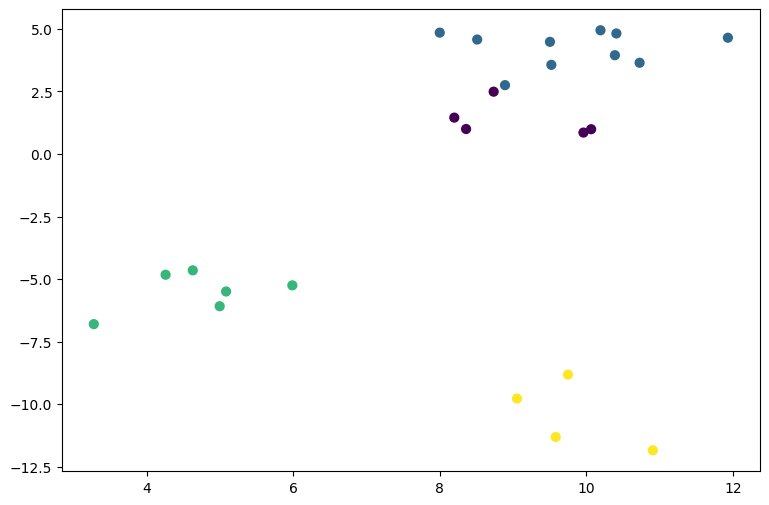

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

plt.figure(figsize = (9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='o', s=40)
plt.show()

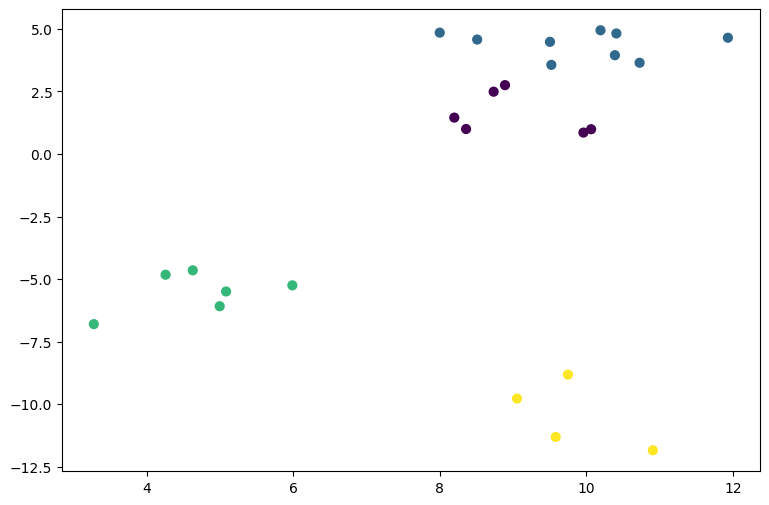

In [113]:
knn5 = KNeighborsClassifier(5)
knn5.fit(X_train, Y_train)

y_pred_5 = knn5.predict(X_test)

plt.figure(figsize = (9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=40)
plt.show()

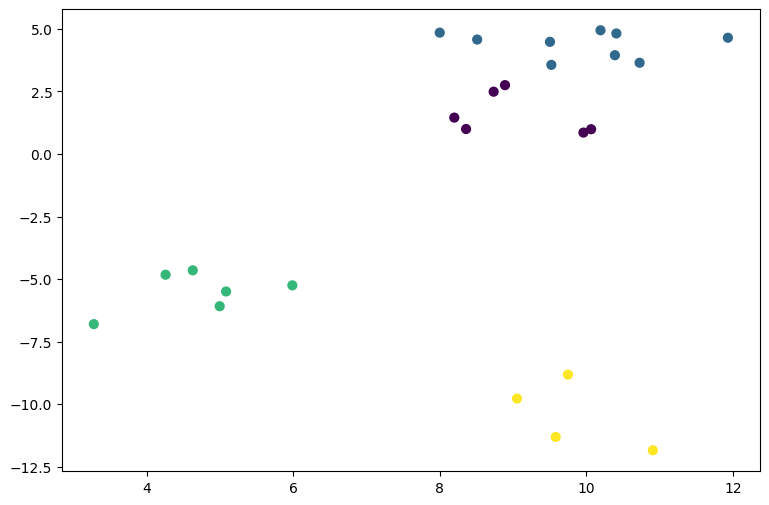

In [114]:
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, Y_train)

y_pred_1 = knn1.predict(X_test)

plt.figure(figsize = (9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=40)
plt.show()

In [115]:
from sklearn.model_selection import GridSearchCV

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
param_grid = {'n_neighbors': np.arange(1, 100)}, cv=5)

knn_grid.fit(X, y)

print (knn_grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weig

{'n_neighbors': np.int64(23)}


In [116]:
def KNN(X_train, X_test, y_train, k):
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  y_pred = np.zeros((num_test, num_train))
  for i in range (num_test):
    for j in range(num_train):
      y_pred[i, j] = np.sqrt(np.sum(np.power(X_test[i, :]-X_train[j, :], 2)))
  results = []
  for i in range(len(y_pred)):
    zipped = zip(y_pred[i, :], y_train)
    res = sorted(zipped, key = lambda x:x[0])
    results_topk = res[:k]
    classes = ()
    for _, j in results_topk:
      j = int(j)
      if j not in classes:
        classes[j] = 1
      else:
        classes[j] = classes[j] + 1
    results.append(max(classes, key = classes.get))
  return np.array(results)
  (X, y) = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1, random_state = 4)
  X_test = np.array([(1, 3)])
  results = KNN(X, X_test, y, 3)
  print(results)